# Data Fetching from Staff.am and Analysis

In [65]:
import re
import time
import requests
from scrapy.http import TextResponse
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.style as style 
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob, Word
import nltk
from nltk.corpus import stopwords, words

In [2]:
url = "https://staff.am/en/jobs/categories/index?JobsFilter%5Bkey_word%5D="

In [3]:
page = requests.get(url)

In [4]:
response = TextResponse(url= page.url,body=page.text,encoding ="utf-8")

In [5]:
def jobs_scraper(url):
    page = requests.get(url)
    response = TextResponse(url= page.url,body=page.text,encoding ="utf-8")
    jobs = response.xpath('//p[@class="font_bold"]/text()').extract()
    return jobs

In [6]:
all_jobs  = []
i = 1 
while True :
    urls = "https://staff.am/en/jobs?JobsFilter%5Bkey_word%5D=&page={}&per-page=50".format(i)
    current_jobs = jobs_scraper(urls)
    if len(current_jobs) == 0:
        break
    else :
        all_jobs.extend(current_jobs)
        i +=1
        time.sleep(2)

In [7]:
print(len(all_jobs))
print(all_jobs[14])

670
Operator


In [8]:
def companies_scraper(url):
    page = requests.get(url)
    response = TextResponse(url= page.url,body=page.text,encoding ="utf-8")
    companies = response.xpath('//div[@class="job-inner job-item-title"]/p[2]/text()').extract()
    return companies

In [9]:
all_companies  = []
i = 1 
while True :
    urls = "https://staff.am/en/jobs?JobsFilter%5Bkey_word%5D=&page={}&per-page=50".format(i)
    current_companies = companies_scraper(urls)
    if len(current_companies) == 0:
        break
    else :
        all_companies.extend(current_companies)
        i +=1
        time.sleep(2)

In [10]:
print(len(all_companies))
print(all_companies[14])

670
Mercedes-Benz Armenia | Avangard Motors LLC


In [11]:
def job_url_scraper(url):
    page = requests.get(url)
    response = TextResponse(url= page.url,body=page.text,encoding ="utf-8")
    job_url = response.css("a[class='load-more btn width100 job_load_more radius_changes']::attr(href)").extract()
    return job_url 

In [12]:
all_urls  = []
i = 1 
while True :
    urls = "https://staff.am/en/jobs?JobsFilter%5Bkey_word%5D=&page={}&per-page=50".format(i)
    current_url = job_url_scraper(urls)
    if len(current_url) == 0:
        break
    else :
        all_urls.extend(current_url)
        i +=1
        time.sleep(2) 

In [13]:
all_jobs_urls  = ["https://staff.am{}". format(i) for i in all_urls]

In [14]:
len(all_jobs_urls)

670

In [15]:
def category_scraper(url):
    page = requests.get(url)
    response = TextResponse(url = page.url, body = page.text, encoding = "utf-8")
    category = response.xpath('//div[@class="col-lg-6 job-info"]/p[2]/text()').extract()[1]
    return category

In [16]:
all_categories=[]
for i in all_jobs_urls:
    try:
        all_categories.append(category_scraper(i))
    except IndexError:
        all_categories.append(" ")
        time.sleep(2)

In [17]:
print(len(all_categories))
print(all_categories[4])

670
 Marketing/Advertising/PR 


In [18]:
def job_type_scraper(url):
    page = requests.get(url)
    response = TextResponse(url = page.url, body = page.text, encoding = "utf-8")
    job_type = response.xpath('//div[@class="col-lg-6 job-info"]/p[1]/text()').extract()[-1]
    return job_type

In [19]:
all_job_types=[]
for i in all_jobs_urls:
    try:
        all_job_types.append(job_type_scraper(i))
    except IndexError:
        all_job_types.append(" ")
        time.sleep(2)

In [20]:
print(len(all_job_types))
print(all_job_types[14])

670
 Full time 


In [21]:
def industry_scraper(url):
    page = requests.get(url)
    response = TextResponse(url = page.url, body = page.text, encoding = "utf-8")
    industry =response.css('[class="professional-skills-description mrgb0 hs_ellipses"]>span::attr(title)').extract()[0]
    return industry

In [27]:
all_industries =[]
for i in all_jobs_urls:
    try:
        all_industries.append(industry_scraper(i))
    except IndexError:
        all_industries.append(" ")
        #time.sleep(2)

In [28]:
print(len(all_industries))
print(all_industries[14])

670
Import/Export/Trade


In [29]:
def soft_skills_scraper(url):
    page = requests.get(url)
    response = TextResponse(url = page.url, body = page.text, encoding = "utf-8")
    soft_skills = response.xpath("//div[@class='soft-skills-list clearfix']/h3[text()='Soft skills']/following-sibling::p/span/text()").extract()[0]
    prof_skills = response.xpath("//div[@class='soft-skills-list clearfix']/h3[text()='Professional skills']/following-sibling::p/span/text()").extract()[0]
    return [soft_skills,prof_skills]

In [30]:
all_soft_skills =[]
all_prof_skills =[]
for i in all_jobs_urls:
    try:
        all_soft_skills.append(soft_skills_scraper(i)[0])
        all_prof_skills.append(soft_skills_scraper(i)[1])
    except IndexError:
        all_soft_skills.append(" ")
        all_prof_skills.append(" ")
        #time.sleep(2)

In [31]:
print(len(all_soft_skills))
print(all_soft_skills[14])

670
Time management 


In [32]:
print(len(all_prof_skills))
print(all_prof_skills[14])

670
MS Excel


In [33]:
df = pd.DataFrame(list(zip(all_jobs,all_companies,all_categories,all_industries,all_soft_skills,all_prof_skills,all_job_types)),
               columns = ["Position","Organization","Job_Category","Industry","Soft_skills","Professional_skills","Type"])

In [34]:
df

,Position,Organization,Job_Category,Industry,Soft_skills,Professional_skills,Type
0,Finance flow supervisor,Jermuk International Pepsi-Cola Bottler LLC,Finance Management,Mining/Manufacturing/Production,Leadership skills,Conflict management,Full time
1,Junior Frontend Developer,Joomag,Software development,Information technologies,,,Full time
2,Electronics and Automation Engineer,Jermuk International Pepsi-Cola Bottler LLC,Production,Mining/Manufacturing/Production,Positive attitude,Electrical Engineering,Full time
3,Maintenance Supervisor,Jermuk International Pepsi-Cola Bottler LLC,Production,Mining/Manufacturing/Production,Work under pressure,Computer knowledge,Full time
4,SMM Specialist,SIL Capital Construction,Marketing/Advertising/PR,Design/Architecture/Construction,Presentation skills,Marketing research,Full time
5,Operator,MINISO Armenia,Administrative/office-work,Retail business,,,Full time
6,Cashier-operator,Թել-Սել ՓԲԸ,Accounting/Bookkeeping,Finance/Banking/Insurance,Personal branding,MS Office,Full time
7,HR Specialist,staff.am Partner Company,Human Resources,Consulting,,,Full time
8,Front-end developer,All.me LLC,Software development,Information technologies,Hardworking,JavaScript,Full time
9,Колл центр агент по продажам (русскоговорящий),HireBee Kazakhstan,Sales/service management,Information technologies,Customer/service oriented,Sales/service experience,Full time


In [35]:
df.columns

Index(['Position', 'Organization', 'Job_Category', 'Industry', 'Soft_skills',
       'Professional_skills', 'Type'],
      dtype='object')

In [36]:
df['Soft_skills']=df['Soft_skills'].apply(lambda x:None if x==" " else x)
df['Professional_skills']=df['Professional_skills'].apply(lambda x:None if x==" " else x)
df['Industry']=df['Industry'].apply(lambda x:None if x==" "else x)
df['Position']=df['Position'].apply(lambda x:None if x==" " else x)
df['Organization']=df['Organization'].apply(lambda x:None if x==" " else x)
df['Job_Category']=df['Job_Category'].apply(lambda x:None if x==" " else x)
df['Type']=df['Type'].apply(lambda x:None if x==" " else x) 

In [37]:
df.Position = df.Position.str.lower() 

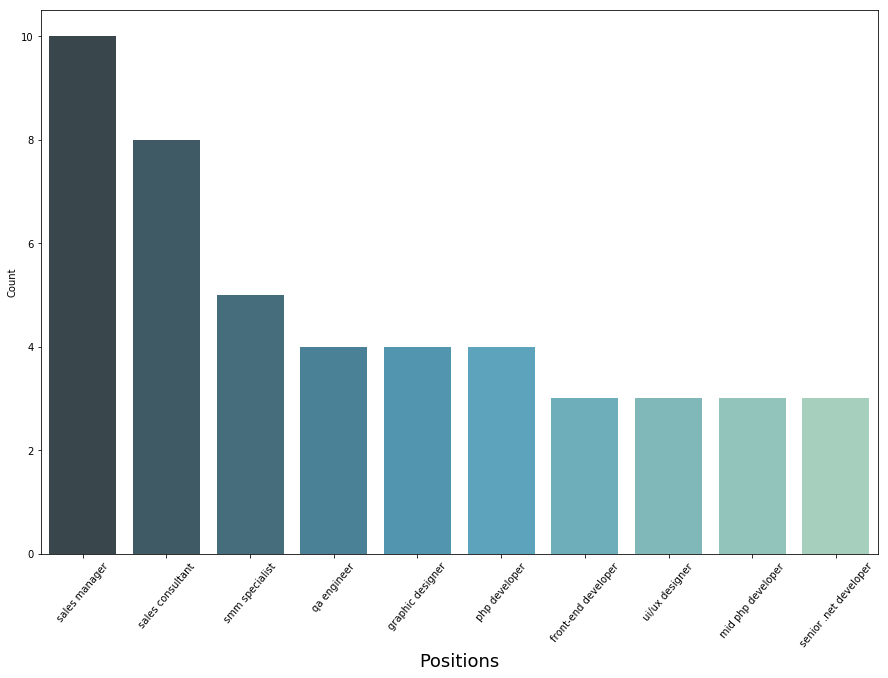

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(df.Position.value_counts()[:10].index,df.Position.value_counts()[:10],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=50)
#plt.title("Top 10 Job Positions",fontsize=25)
plt.xlabel("Positions",fontsize=18)
plt.ylabel("Count")
plt.show()


In [39]:
df.Industry = df.Industry.str.lower() 

In [40]:
df.Industry.value_counts()[:10]

information technologies             292
finance/banking/insurance             50
import/export/trade                   36
mining/manufacturing/production       35
education                             27
tourism/hospitality/entertainment     26
foundation                            18
services                              15
telecommunications                    14
consulting                            11
Name: Industry, dtype: int64

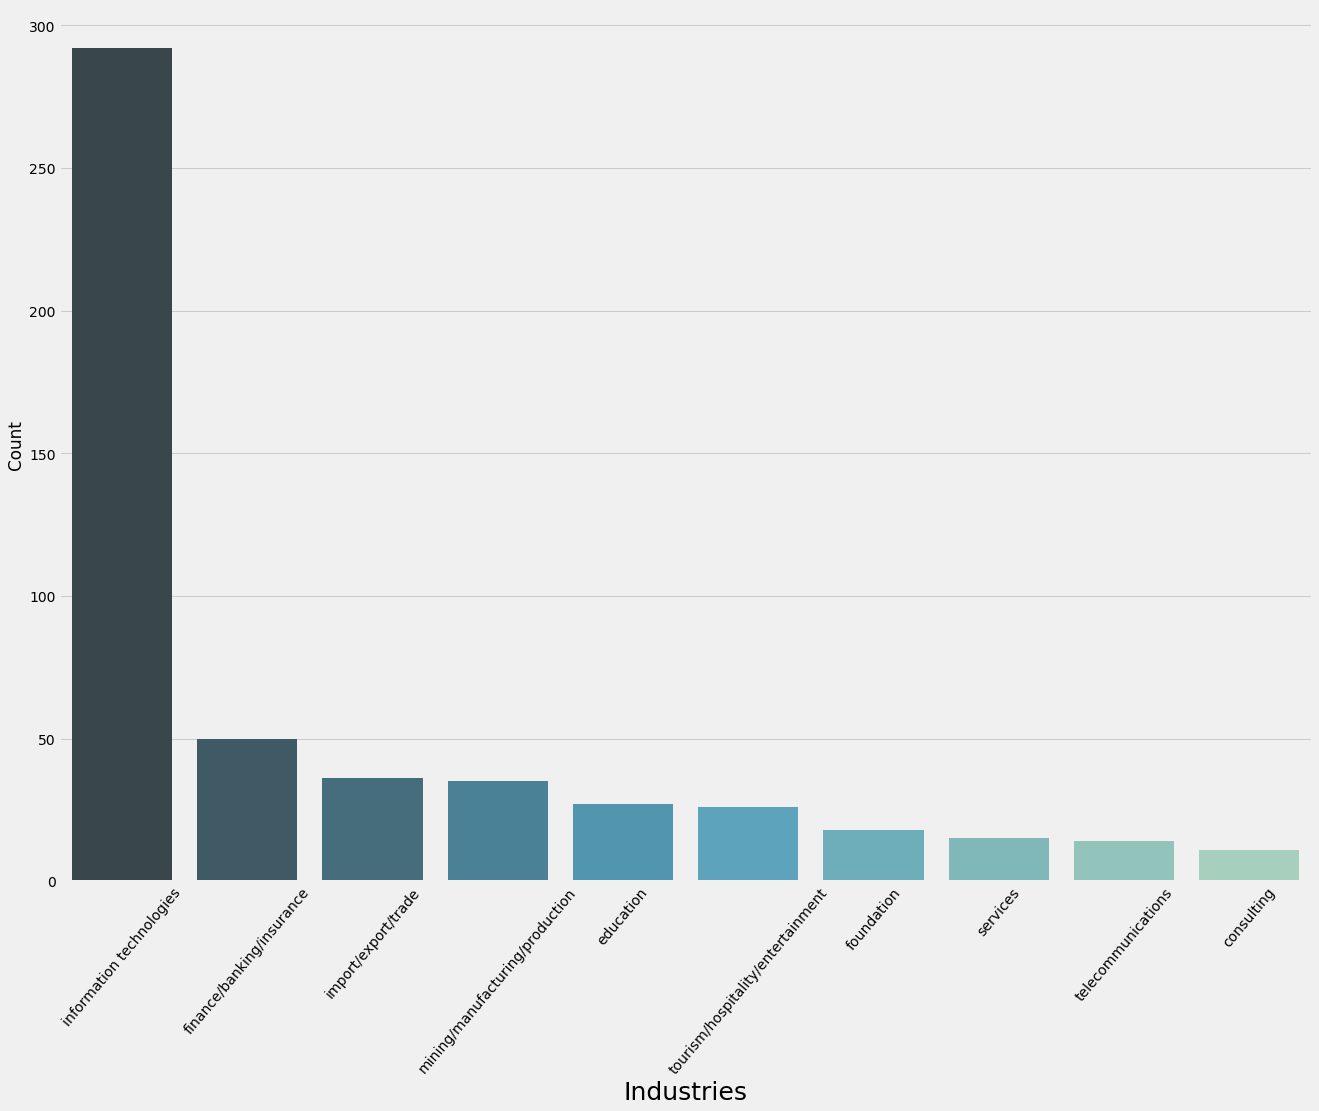

In [41]:
plt.figure(figsize=(20,15))
sns.barplot(df.Industry.value_counts()[:10].index,df.Industry.value_counts(dropna=True)[:10],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=50)
#plt.title("Top 10 Industries",fontsize=25)
plt.xlabel("Industries",fontsize=25)
plt.ylabel("Count");

In [42]:
filter_industry = df[df.Industry == ("information technologies")]
filter_industry

,Position,Organization,Job_Category,Industry,Soft_skills,Professional_skills,Type
1,junior frontend developer,Joomag,Software development,information technologies,None,None,Full time
8,front-end developer,All.me LLC,Software development,information technologies,Hardworking,JavaScript,Full time
9,колл центр агент по продажам (русскоговорящий),HireBee Kazakhstan,Sales/service management,information technologies,Customer/service oriented,Sales/service experience,Full time
11,front-end developer,Accontech,Software development,information technologies,Positive attitude,JavaScript Frameworks,Full time
15,c++\computer vision engineer,Develandoo LLC,Software development,information technologies,None,None,Full time
17,quality engineer,Workfront Armenia,Quality Assurance /Control,information technologies,Positive attitude,Selenium,Full time
24,project manager,Digitain,Product/Project Management,information technologies,None,None,Full time
28,ios developer,Fifth LLC,Software development,information technologies,Positive attitude,iOS SDK,Full time
40,smm manager,10Web,Marketing/Advertising/PR,information technologies,Proactive,WordPress,Full time
48,monitoring operator,BetConstruct,Data Collection & Analytics,information technologies,Problem solving,Windows Server,Full time


In [43]:
filter_industry.Soft_skills = filter_industry.Soft_skills.str.lower() 

C:\USB_DRIVE\Anaconda\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


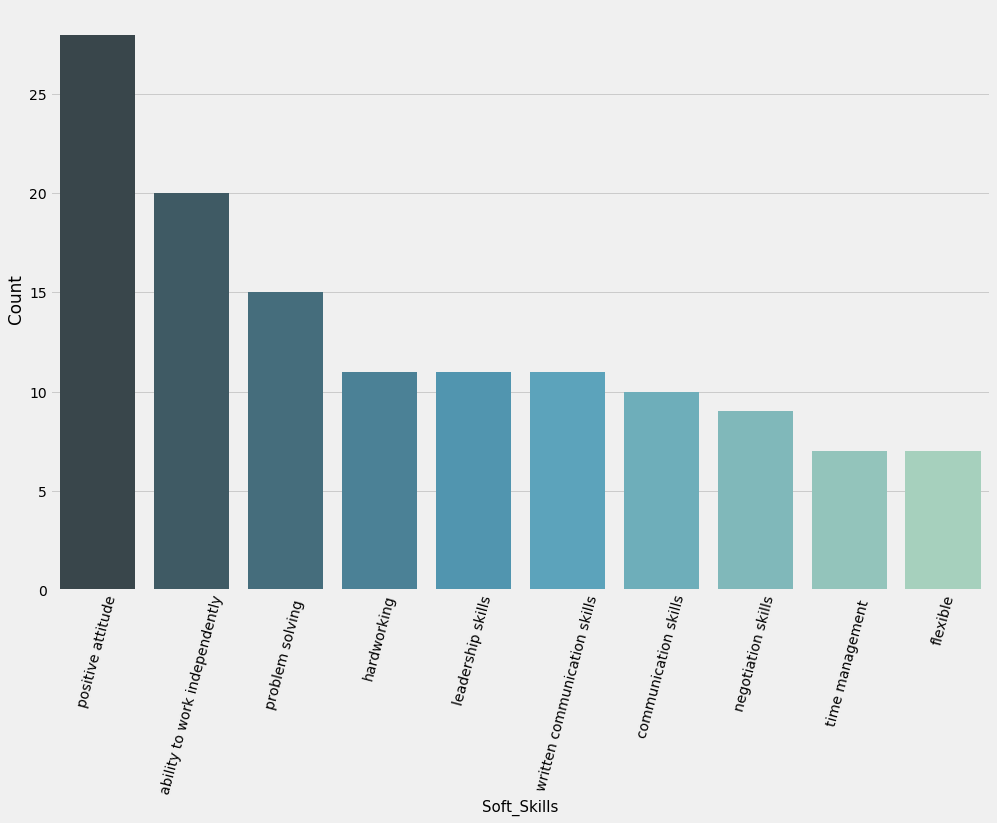

No handles with labels found to put in legend.


In [44]:
plt.figure(figsize=(15,10))
a = sns.barplot(filter_industry.Soft_skills.value_counts()[:10].index,filter_industry.Soft_skills.value_counts()[:10],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=75)
#plt.title("Top 10 Soft Skills required in IT",fontsize=25)
plt.xlabel("Soft_Skills",fontsize=15)
plt.ylabel("Count")
plt.show()
a.legend(fontsize=14)

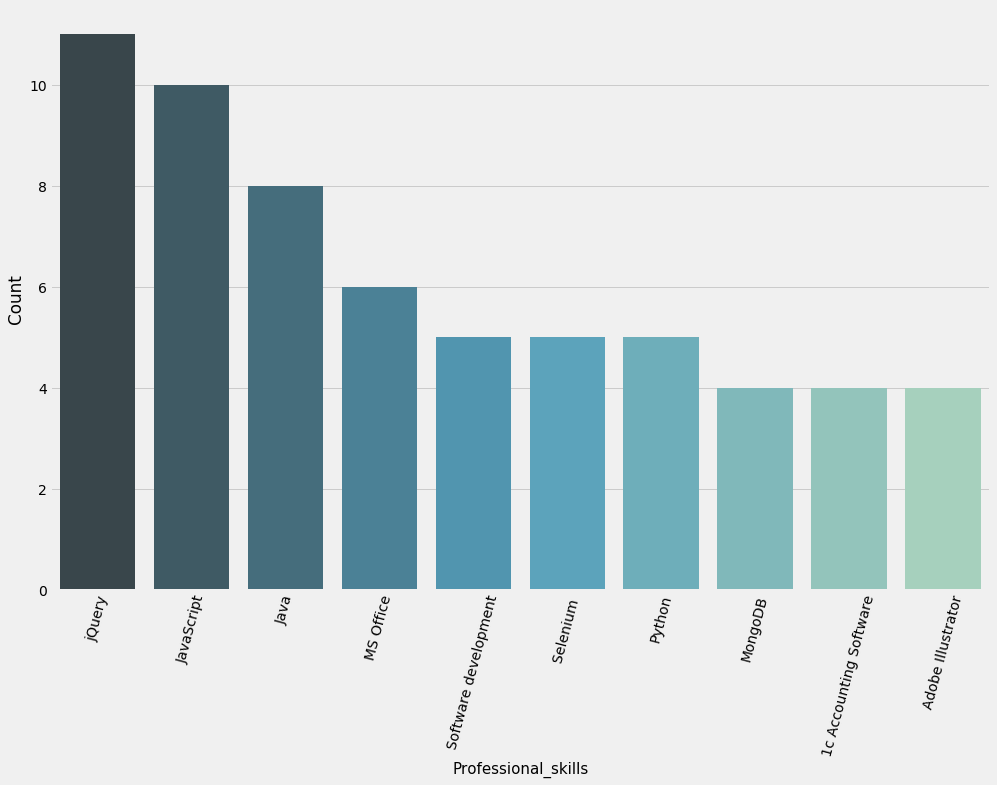

No handles with labels found to put in legend.


In [45]:
plt.figure(figsize=(15,10))
a = sns.barplot(filter_industry.Professional_skills.value_counts()[:10].index,filter_industry.Professional_skills.value_counts()[:10],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=75)
#plt.title("Top 10 Professional_skills required in IT",fontsize=25)
plt.xlabel("Professional_skills",fontsize=15)
plt.ylabel("Count")
plt.show()
a.legend(fontsize=14)

In [46]:
top_postings = filter_industry.Position.value_counts()[:10]
top_postings 

qa engineer                 4
front-end developer         3
big data engineer           3
manual qa engineer          3
react.js developer          2
devops engineer             2
python developer            2
computer vision engineer    2
graphic designer            2
senior .net developer       2
Name: Position, dtype: int64

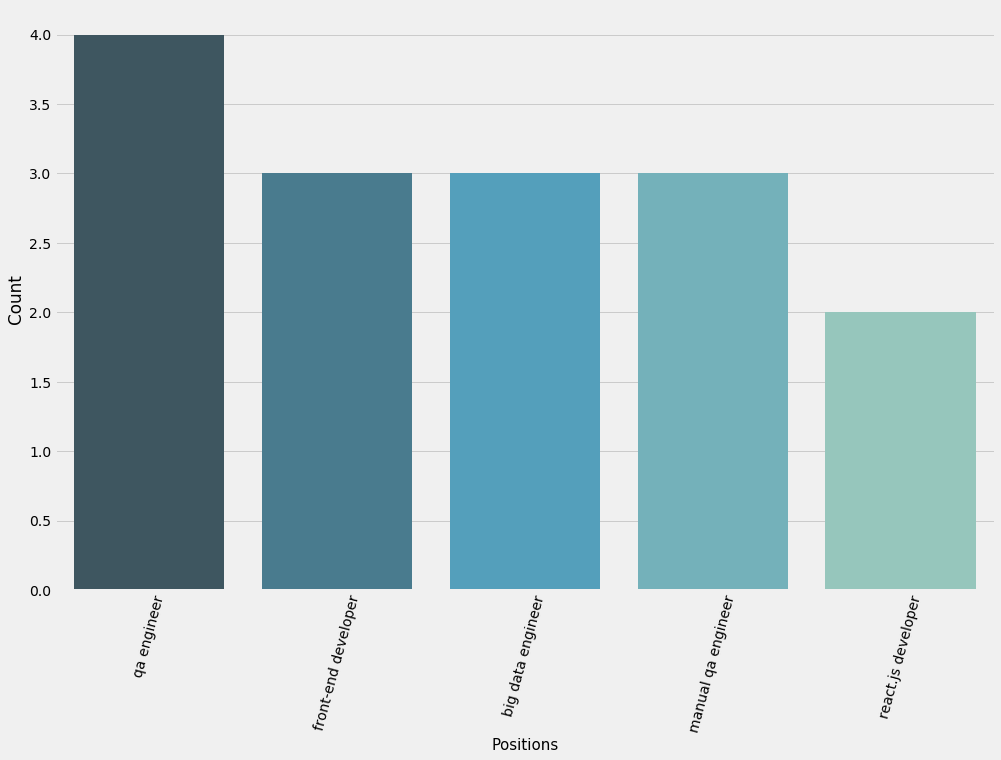

No handles with labels found to put in legend.


In [47]:
plt.figure(figsize=(15,10))
a = sns.barplot(filter_industry.Position.value_counts()[:5].index,filter_industry.Position.value_counts()[:5],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=75)
#plt.title("Top 5 IT Positions",fontsize=25)
plt.xlabel("Positions",fontsize=15)
plt.ylabel("Count")
plt.show()
a.legend(fontsize=14)


In [48]:
top_organization = df.Organization.value_counts()[:10]
top_organization1 =  df.Organization.value_counts().index.tolist()[:10]
top_organization1 

['Synopsys Armenia ',
 'ՀՀ կրթության, գիտության, մշակույթի և սպորտի նախարարություն',
 'Digitain ',
 'BetConstruct',
 'PicsArt',
 ' Children of Armenia Charitable Fund',
 'Atenk Ltd',
 'All.me LLC',
 'Alternative Creative Network',
 'CIS Armenia International School']

In [49]:
top_organization

Synopsys Armenia                                              46
ՀՀ կրթության, գիտության, մշակույթի և սպորտի նախարարություն    37
Digitain                                                      22
BetConstruct                                                  22
PicsArt                                                       17
 Children of Armenia Charitable Fund                          15
Atenk Ltd                                                     13
All.me LLC                                                    13
Alternative Creative Network                                  12
CIS Armenia International School                               9
Name: Organization, dtype: int64

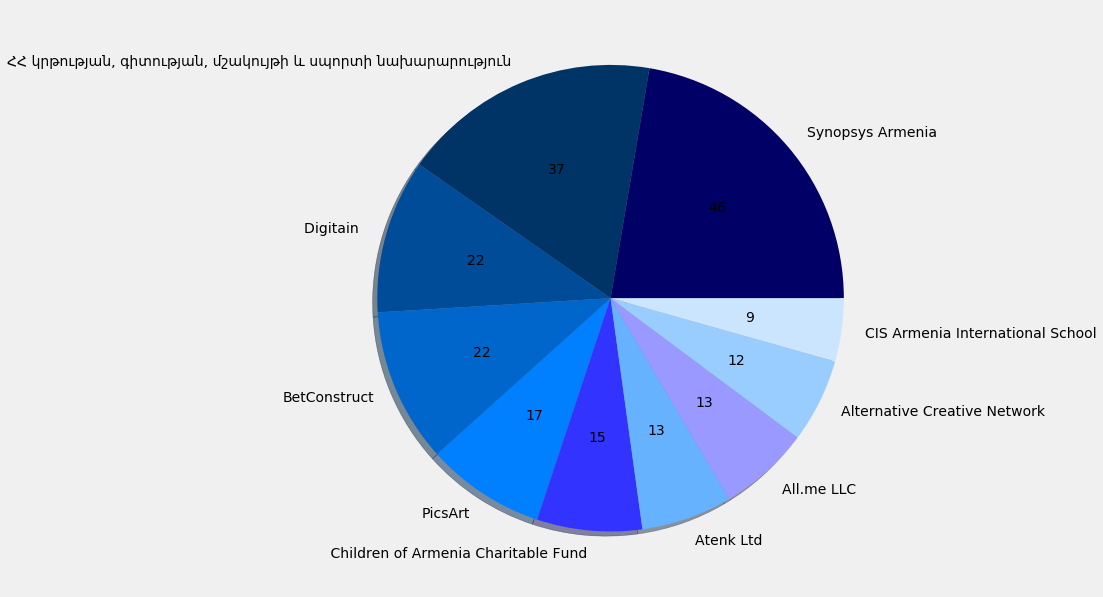

In [50]:
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return  '{v:d}'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(15,10))
labels = top_organization1
colors = ["#000066","#003366","#004C99","#0066CC","#0080FF","#3333FF","#66B2FF","#9999FF","#99CCFF","#CCE5FF"]
sizes =[top_organization[i] for i in range(10)]
plt.pie(sizes,labels=labels,shadow=True,colors=colors,autopct=make_autopct(sizes))
#plt.title("Top 10 Organizations",fontsize=20)
plt.show()


In [51]:
filter_QA = filter_industry[filter_industry.Position == ("qa engineer")]
filter_QA
# Differences of requirements for the same position between companies

,Position,Organization,Job_Category,Industry,Soft_skills,Professional_skills,Type
111,qa engineer,Innorise Entertainment LLC,Quality Assurance /Control,information technologies,None,None,Full time
143,qa engineer,HelpSystems Armenia,Quality Assurance /Control,information technologies,None,None,Full time
214,qa engineer,Varmtech,Quality Assurance /Control,information technologies,positive attitude,Automation testing approaches,Full time
421,qa engineer,BetConstruct,Quality Assurance /Control,information technologies,None,None,Full time


In [52]:
filter_fin = df[df.Industry == ("finance/banking/insurance")]
filter_fin
filter_fin.Soft_skills = filter_fin.Soft_skills.str.lower()

C:\USB_DRIVE\Anaconda\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


No handles with labels found to put in legend.


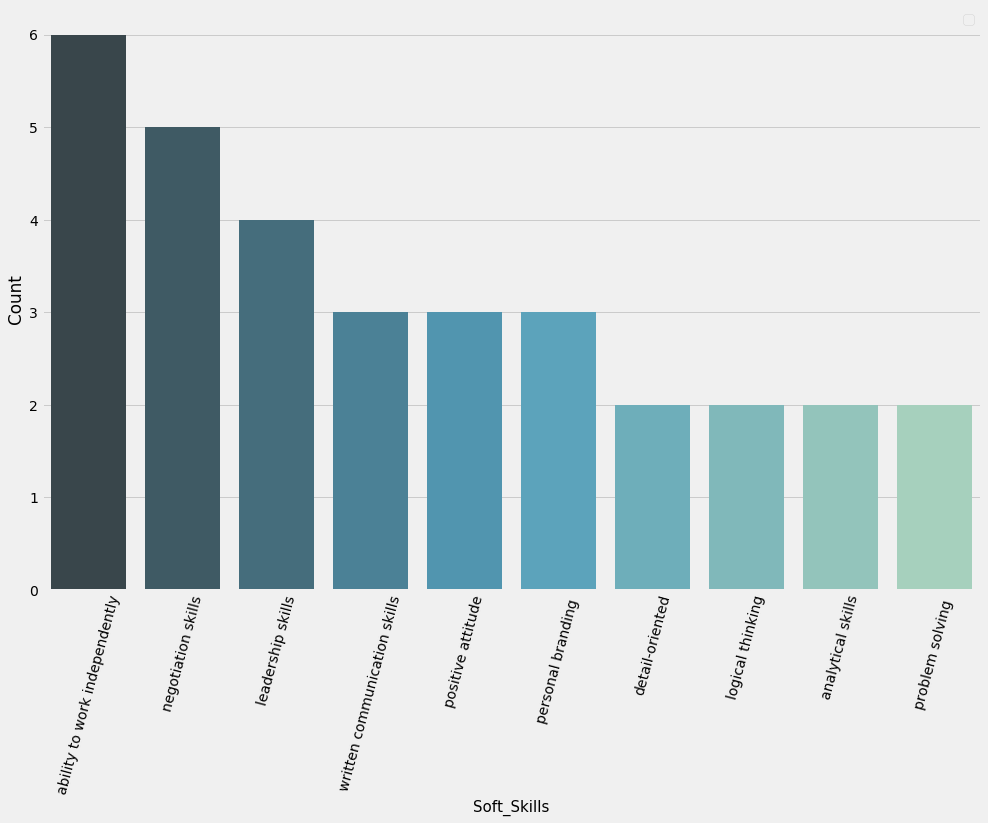

In [53]:
plt.figure(figsize=(15,10))
a = sns.barplot(filter_fin.Soft_skills.value_counts()[:10].index,filter_fin.Soft_skills.value_counts()[:10],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=75)
#plt.title("Top 10 Soft Skills required in Financial Institutions",fontsize=25)
plt.xlabel("Soft_Skills",fontsize=15)
plt.ylabel("Count")
a.legend(fontsize=14)
plt.show()


No handles with labels found to put in legend.


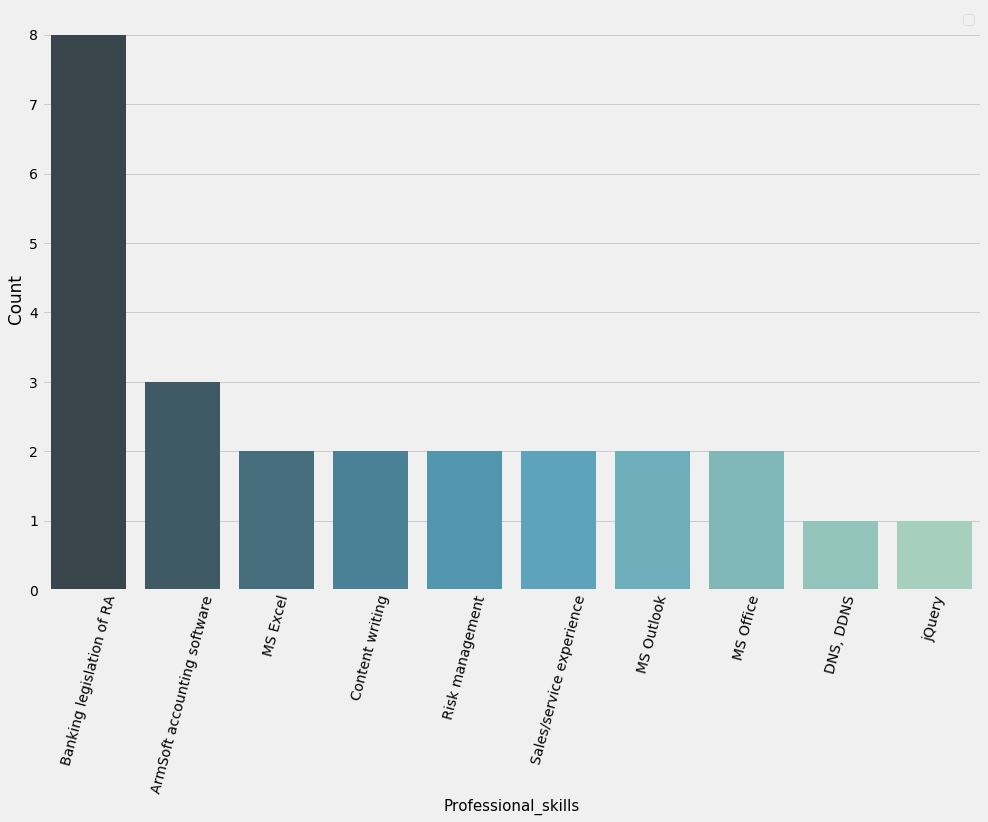

In [54]:
plt.figure(figsize=(15,10))
a = sns.barplot(filter_fin.Professional_skills.value_counts()[:10].index,filter_fin.Professional_skills.value_counts()[:10],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=75)
#plt.title("Top 10 Professional_skills required in Financial Institutions",fontsize=25)
plt.xlabel("Professional_skills",fontsize=15)
plt.ylabel("Count")
a.legend(fontsize=14)
plt.show()


In [55]:
filter_fin.Position.value_counts()[:10]

internal auditor                                 2
loan officer in artashat branch                  1
հաճախորդների առաջատար մենեջեր                    1
բիզնես խորհրդատու                                1
risk, internal control and compliance manager    1
arabic support manager                           1
financial reporting officer                      1
branch intern                                    1
senior php developer/team lead                   1
գործառնավար-գանձապահ                             1
Name: Position, dtype: int64

No handles with labels found to put in legend.


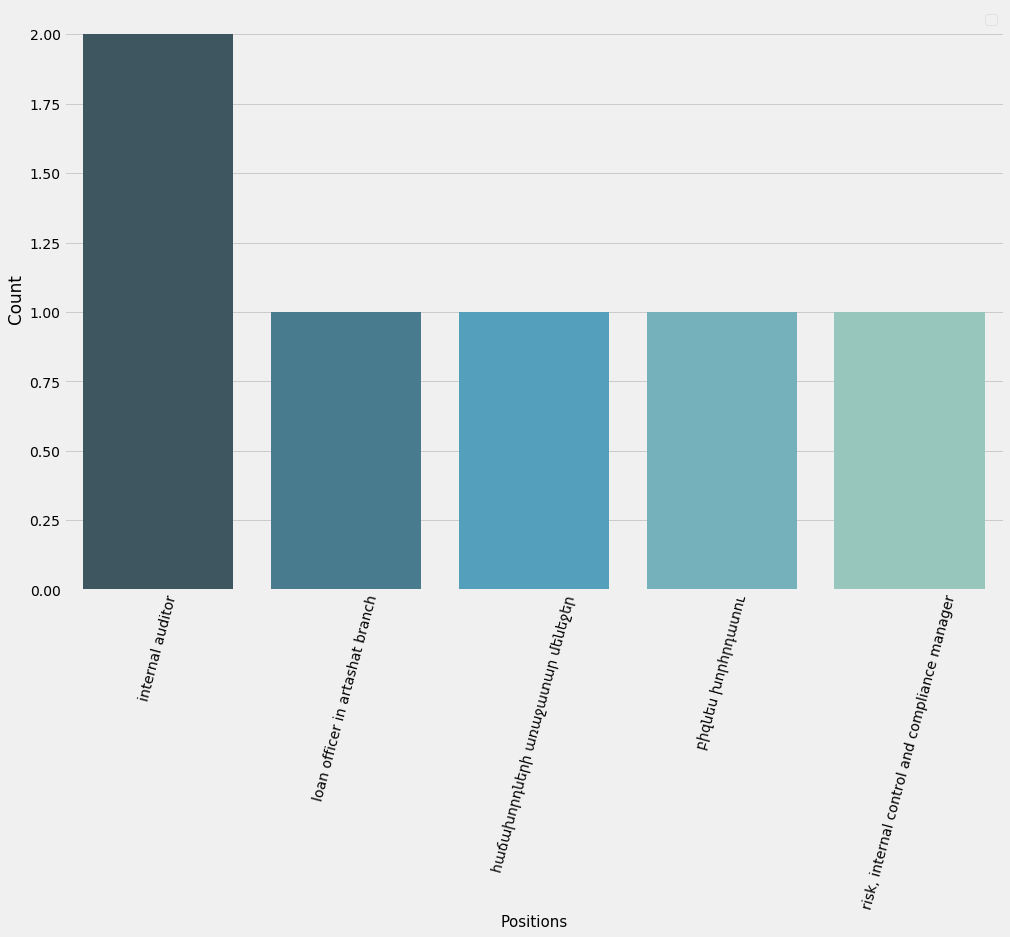

In [56]:
plt.figure(figsize=(15,10))
a = sns.barplot(filter_fin.Position.value_counts()[:5].index,filter_fin.Position.value_counts()[:5],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=75)
#plt.title("Top 5 Financial Institutions Positions",fontsize=25)
plt.xlabel("Positions",fontsize=15)
plt.ylabel("Count")
a.legend(fontsize=14)
plt.show()



In [57]:
job_type = df.Type.value_counts()[:4]
job_type

 Full time               586
 Fixed term contract      39
 Part time                22
 Other                    16
Name: Type, dtype: int64

No handles with labels found to put in legend.


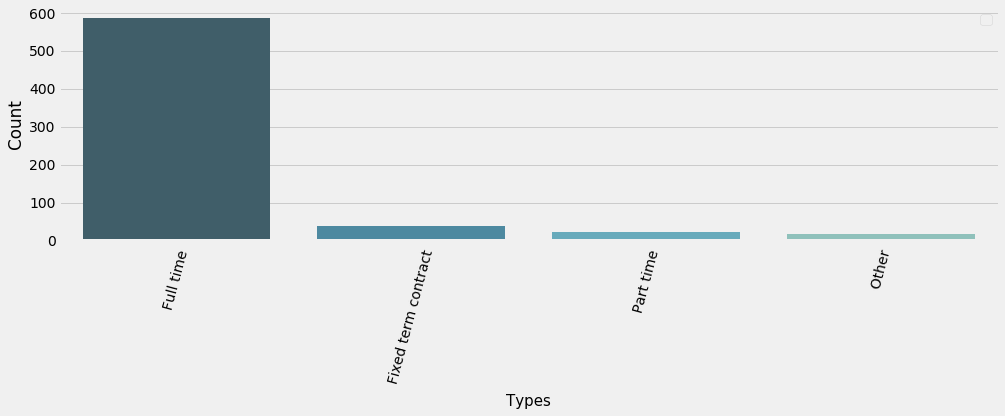

In [58]:
plt.figure(figsize=(15,4))
a = sns.barplot(df.Type.value_counts()[:4].index,df.Type.value_counts()[:4],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=75)
#plt.title("Job Types",fontsize=25)
plt.xlabel("Types",fontsize=15)
plt.ylabel("Count")
a.legend(fontsize=14)
plt.show()


In [59]:
df.Job_Category.value_counts()[:10]

 Software development              133
 Sales/service management           92
 Education/training                 68
 Other IT                           38
 Marketing/Advertising/PR           37
 Hardware Design / Engineering      33
 Banking/credit                     26
 Administrative/office-work         24
 Web/Graphic design                 23
 Quality Assurance /Control         20
Name: Job_Category, dtype: int64

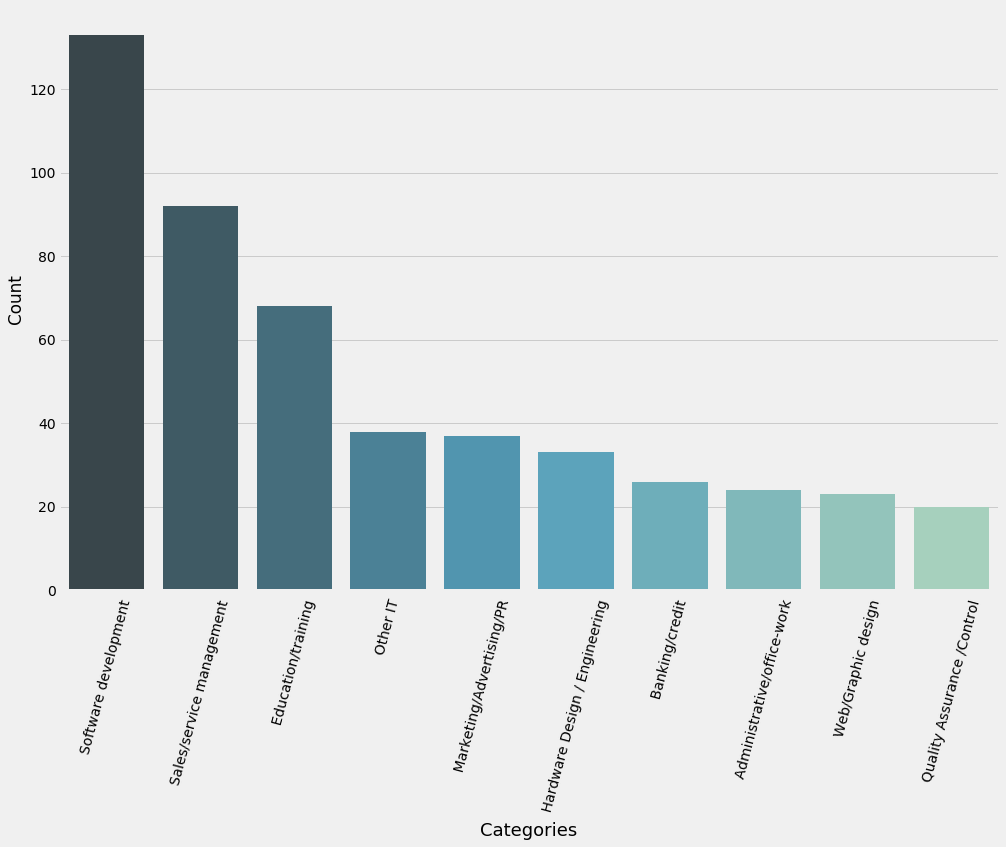

In [60]:
plt.figure(figsize=(15,10))
sns.barplot(df.Job_Category.value_counts()[:10].index,df.Job_Category.value_counts()[:10],palette=("GnBu_d"))
style.use("fivethirtyeight")
plt.xticks(rotation=75)
#plt.title("Top 10 Job Categories",fontsize=25)
plt.xlabel("Categories",fontsize=18)
plt.ylabel("Count")
plt.show()

In [76]:
titles_string=" ".join(df.Position.to_list())
title_blob=TextBlob(titles_string)
title_blob.words[:10]

WordList(['finance', 'flow', 'supervisor', 'junior', 'frontend', 'developer', 'electronics', 'and', 'automation', 'engineer'])

In [87]:
sw = stopwords.words("english") 

In [88]:
all_words=[i for i in title_blob.words.lower() if i not in sw and i.isalnum()]
all_words=pd.Series(all_words)
all_words.value_counts()[:15]

developer     96
engineer      74
specialist    67
senior        59
manager       57
sales         42
տնօրենի       34
պաշտոնի       28
թափուր        28
մրցույթ       28
design        25
մարզի         22
հհ            22
դպրոց         22
designer      21
dtype: int64

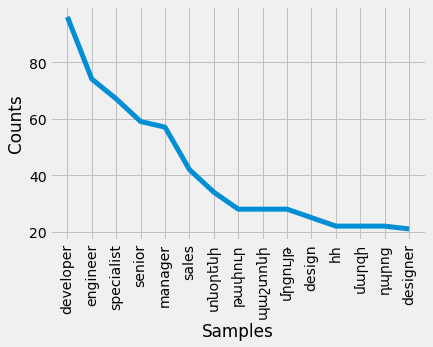

In [89]:
freq=nltk.FreqDist(all_words)
freq.plot(15,linewidth=5)
#title="Word Frequency in Job titles (Staff.am)"